When did we see a video on youtube let’s say it was funny then the next time you open your youtube app you get recommendations of some funny videos in your feed ever thought about how? This is nothing but an application of Machine Learning using which recommender systems are built to provide personalized experience and increase customer engagement.

The system recommends songs similar to a given input song based on metadata such as genre, artist name and track name. We will use the “TCC CEDs Music Dataset” which contains metadata about songs, including their genres, artists and lyrics.

Step 1: Importing Libraries & Dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/tcc_ceds_music.csv')

data.head()

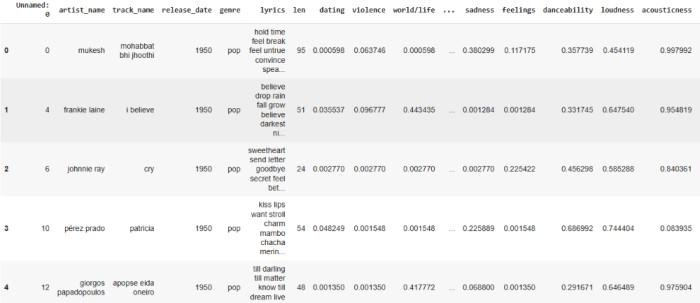

Step 2: Exploratory Data Analysis (EDA)

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='genre', data=data, order=data['genre'].value_counts().index[:10])
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

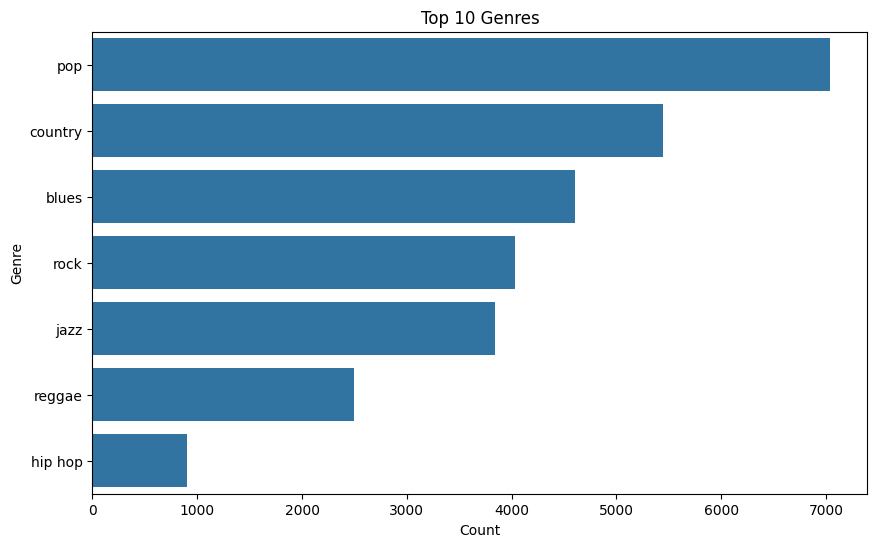

In [ ]:
top_artists = data.groupby('artist_name').size().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title('Top 10 Artists by Number of Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Artist Name')
plt.show()

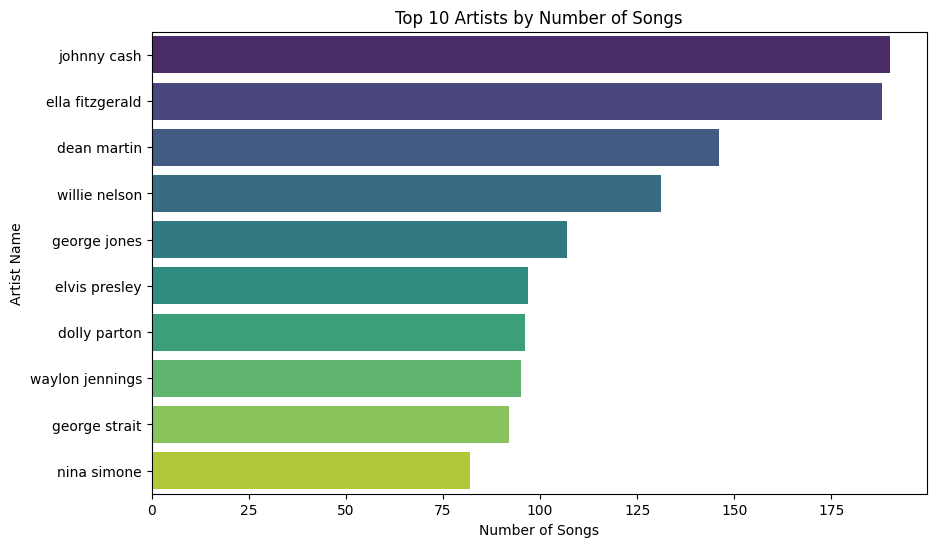

Step 3: Preprocessing the Data

In [ ]:
data['combined_features'] = (
    data['genre'].fillna('') + ' ' +
    data['artist_name'].fillna('') + ' ' +
    data['track_name'].fillna('')
)


In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['combined_features'])


In [ ]:
def get_recommendations(song_title, data, cosine_sim, top_n=10):
    # Get the index of the song that matches the title
    idx = data[data['track_name'] == song_title].index
    if len(idx) == 0:
        print("Song not found in the dataset.")
        return

    idx = idx[0]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:top_n+1]
    song_indices = [i[0] for i in sim_scores]

    recommendations = data.iloc[song_indices]
    return recommendations


Step 4: Generate Recommendations

In [ ]:
recommended_songs = get_recommendations('cry', data, cosine_sim, top_n=10)
print(recommended_songs[['track_name', 'artist_name', 'genre']])


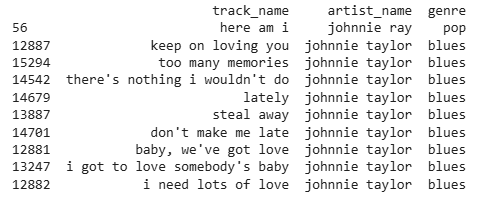

Step 5: Visualize Recommendations


In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(y='track_name', x='artist_name', data=recommended_songs, palette='coolwarm')
plt.title('Recommended Songs Similar to "Cry"')
plt.xlabel('Artist Name')
plt.ylabel('Song Name')
plt.show()


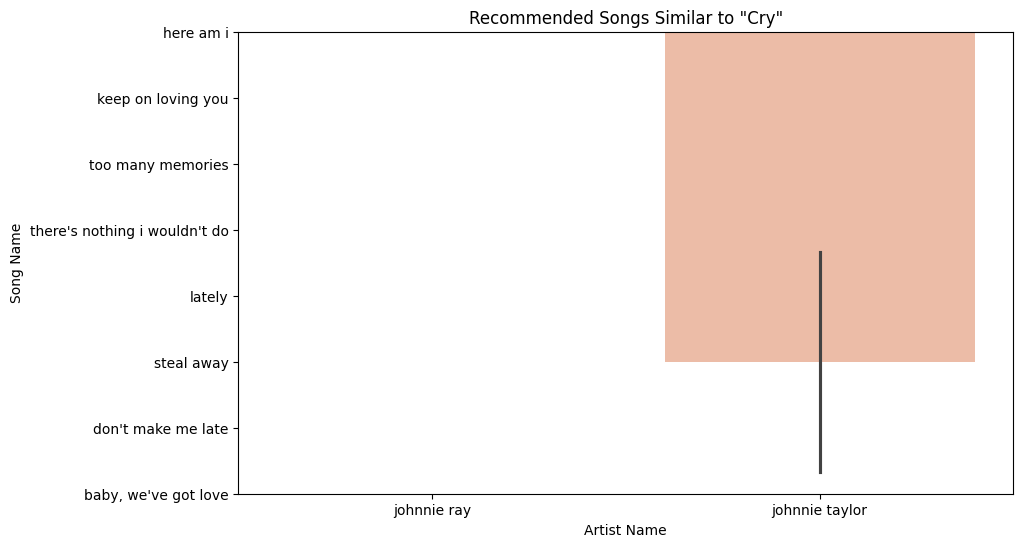